In [3]:
# The purpose of this is for the visualized figures to be inline the browser
%matplotlib inline
import numpy as np
import os

# Import stuff from menpo
import menpo.io as mio
from menpo.feature import no_op, dsift, fast_dsift, double_igo
from menpo.visualize import visualize_images, visualize_pointclouds, print_dynamic, print_progress
from menpo.landmark import labeller, human36M_pose_32, human36M_pose_17

# Import stuff from menpofit
from menpofit.visualize import visualize_shape_model, visualize_fitting_result, plot_ced

# Import stuff from alabortijcv2015 (this will be soon integrated in menpofit)
from alabortijcv2015.aam import PartsAAMBuilder, PartsAAMFitter
from alabortijcv2015.aam.algorithm import SIC, BSC
from alabortijcv2015.utils import pickle_load, pickle_dump
from alabortijcv2015.result import SerializableResult

# Other stuff
import numpy as np
import re
from itertools import islice
save_path='/vol/atlas/homes/mej114/results'

In [4]:
n_training_images = 100
n_testing_images = 100
max_images = n_training_images +n_testing_images
all_paths = []
for path in mio.image_paths('/vol/atlas/databases/body/FashionPose/Trainset/rescaled_img_train/'):
    all_paths.append(path)
    
path_initial = '/vol/atlas/databases/body/FashionPose/Trainset/InitialShapes/'
images = []
for path in print_progress(all_paths[:max_images]):
    im = mio.import_image(path)
    if im.n_channels == 3:
        im = im.as_greyscale(mode='luminosity')
    
    sh = mio.import_landmark_file(path_initial + os.path.basename(str(path))[:-3] + 'ljson')
    im.landmarks['CNN'] = sh    
    images.append(im)

[====================] 100% (200/200) - 00:00:00 remaining


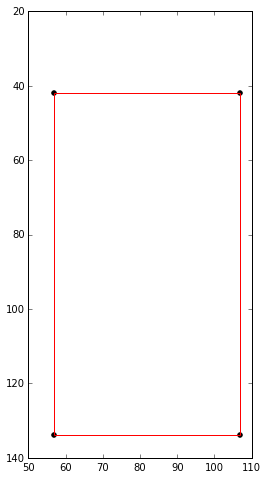

In [5]:
a=images[0].landmarks['LJSON']['torso']
b=a.bounding_box()
b.view()

In [6]:
c=b.points

In [7]:
import math
x=c[1][0]-c[0][0]
y=c[1][1]-c[3][1]
d=math.sqrt(x*x+y*y)

In [8]:
a1=images[1].landmarks['LJSON']['torso']

In [85]:
 def compute_error_custom(pointcloud1,pointcloud2):
        import math
        from menpo.shape import PointUndirectedGraph
              
        adjency_matrix=np.array([[0, 1, 1, 0, 0],
                         [1, 0, 1, 1, 0],
                         [1, 1, 0, 0, 1],
                         [0, 1, 0, 0, 1],
                         [0, 0, 1, 1, 0]])
        a=pointcloud1.lms.points[:5]
        a=PointUndirectedGraph(np.array(a),adjency_matrix)
        b=a.bounding_box().points
 
        x=b[1][0]-b[0][0]
        y=b[1][1]-b[3][1]
        norm=math.sqrt(x*x+y*y)
        d=pointcloud1.lms.distance_to(pointcloud2.lms)
        distance=[d[i][i]/norm for i in range(len(d))]
       
        return np.sqrt(np.sum([pow(distance[i],2) for i in range(len(distance))], axis=-1))

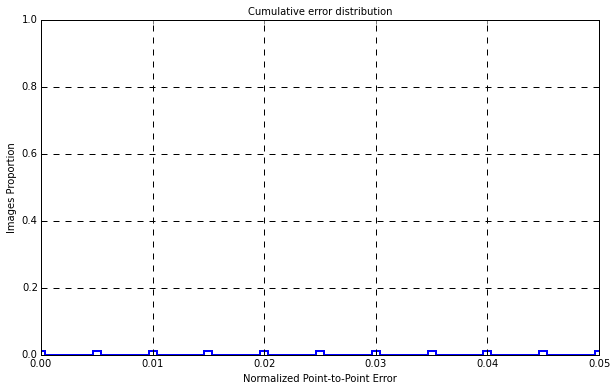

In [86]:
error=[]
for im in images:
    m=im.landmarks['LJSON']
    n=im.landmarks['CNN']
    distance=compute_error_custom(m,n)
    error.append(distance)
plot_ced(error)

In [87]:
print("               |  mean  | median |  std  ")

print("Fitting result | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(error), 
                                                            np.median(error),
                                                            np.std(error)))

               |  mean  | median |  std  
Fitting result | 0.2415 | 0.2299 | 0.0791


In [24]:
fitter_results_17=pickle_load(save_path+'dsfit_noiseNone_FashionPose_17.pickle')

In [25]:
fitter_results_19=pickle_load(save_path+'dsfit_noiseNone_FashionPose_19.piclke')

In [79]:
m=fitter_results_17[0].fitted_image.landmarks['ground']
n=fitter_results_17[0].fitted_image.landmarks['final']
distance=compute_error_custom(m,n)

[0.043787953810071639, 0.042709977321286612, 0.033567280109994782, 0.026686019342405849, 0.070726851168212729, 0.18290474148030325, 0.057342122057866853, 0.041605161389497415, 0.076389085042891117, 0.13980228061875002, 0.10822890710152487, 0.059795876058893235, 0.024812477021135829, 0.070902365435383238, 0.11804676633419248, 0.048095257821448779, 0.1737113917753923]
103.368273663


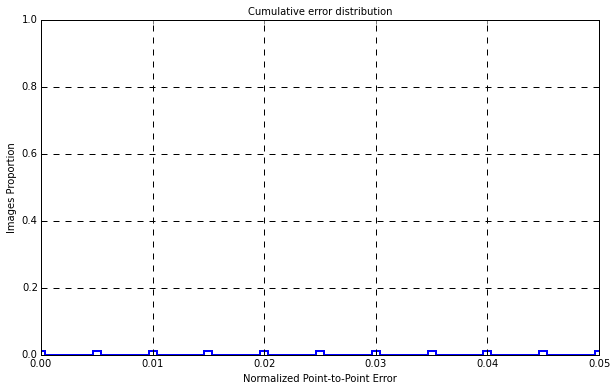

In [74]:
error=[]
for im in fitter_results_17:
    m=im.fitted_image.landmarks['ground']
    n=im.fitted_image.landmarks['final']
    distance=compute_error_custom(m,n)
    error.append(distance)
plot_ced(error)

In [75]:
print("               |  mean  | median |  std  ")

print("Fitting result | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(error), 
                                                            np.median(error),
                                                            np.std(error)))

               |  mean  | median |  std  
Fitting result | 0.4198 | 0.3989 | 0.1342


In [108]:
 def compute_error_custom(pointcloud1,pointcloud2):
        import math
        from menpo.shape import PointUndirectedGraph
              
        adjency_matrix=np.array([[0, 1, 1, 0, 0],
                         [1, 0, 1, 1, 0],
                         [1, 1, 0, 0, 1],
                         [0, 1, 0, 0, 1],
                         [0, 0, 1, 1, 0]])
        a=pointcloud1.lms.points[:5]
        a=PointUndirectedGraph(np.array(a),adjency_matrix)
        b=a.bounding_box().points
 
        x=b[1][0]-b[0][0]
        y=b[1][1]-b[3][1]
        norm=math.sqrt(x*x+y*y)
       
        return np.mean(np.sqrt(np.sum((pointcloud1.lms.points-pointcloud2.lms.points)**2,axis=-1)))/norm

In [109]:
np.mean(np.sqrt(np.sum((m.lms.points-n.lms.points)**2/103,axis=-1)))

0.41681399657977614

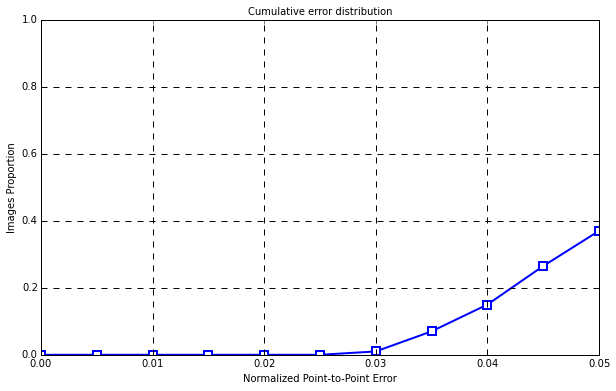

In [110]:
error=[]
for im in images:
    m=im.landmarks['LJSON']
    n=im.landmarks['CNN']
    distance=compute_error_custom(m,n)
    error.append(distance)
plot_ced(error)

In [111]:
print("               |  mean  | median |  std  ")

print("Fitting result | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(error), 
                                                            np.median(error),
                                                            np.std(error)))

               |  mean  | median |  std  
Fitting result | 0.0574 | 0.0545 | 0.0179
